# Dolar Forecasting

This is a simple side project for dolar forecasting. Here I intend to work with the foundations of Machine Learning and build from scratch the algorithms. Without frameworks and librarys as Scikit Learn or Pytorch. Just simple Python code  

While the analysis of the exchange rate is important, it is fundamental to acknowledge its limitations as an economic indicator. The dollar quotation, by itself,  should not be interpreted in isolation as a comprehensive measure of the purchasing power or quality of life of the Brazilian population.

### Dataset

The dataset used in this project was extracted from ["Economática"](https://www.economatica.com/), a comprehensive platform for financial data. 

In June 1994, Brazil implemented the "Plano Real", a economic strategy that changed the country's currency. When the Real was introduced, his value was pegged to U.S dolar, this means that R$1 was equal to US$1.    

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
file_name = "dolar_dataset.xlsx"
dataset = pd.read_excel(file_name)

In [41]:
dataset.head(5)

,Mes_Ano,Fechamento
0,1994-06,1.000
1,1994-07,0.940
2,1994-08,0.889
3,1994-09,0.853
4,1994-10,0.846


The date column (Mes_Ano) was originally in YYYY-MM string formart. For a better analysis and aggregation, this column was split into two separate columns: 'Ano' (Year) and 'Mês' (Month). 

The column names were kept in their original Brazilian Portuguese and in the followind order:

* Mês = Month -> The reference month of observation
* Ano = Year -> The reference year of observation
* Fechamento = Closing Value -> The exchange rate of the U.S. Dollar (USD) to the Brazilian Real (BRL) at the end of the month

In [42]:
splited_data = dataset['Mes_Ano'].str.split('-', expand=True)
dataset = dataset.drop(columns=['Mes_Ano'])
dataset['Ano'] = pd.to_numeric(splited_data[0]) 
dataset['Mês'] = splited_data[1]

In [43]:
new_column_order = ['Mês', 'Ano', 'Fechamento']
dataset = dataset[new_column_order]

In [44]:
df_grouped_by_year = dataset.groupby('Ano', as_index=False)['Fechamento'].mean()

[]

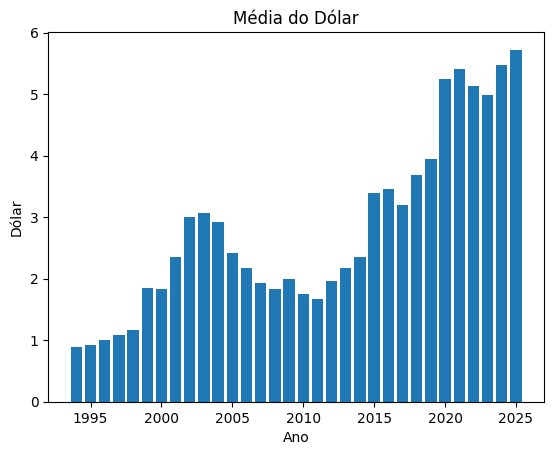

In [45]:
plt.bar(df_grouped_by_year['Ano'], df_grouped_by_year['Fechamento'])
plt.title('Média do Dólar')
plt.xlabel('Ano')
plt.ylabel('Dólar')
plt.plot()

To mantain data integrity, a copy of the original dataset was made before proceeding with the analysis. On this copied dataset, the data was aggregated into 4-year periods. This timeframe was chosen to effectively analyze long-term economic trends across different presidential terms, since elections in Brazil are held every four years.

In [46]:
df_grouped_by_four_years = dataset.copy()

In [47]:
initial_year = df_grouped_by_four_years['Ano'].min()
group_identifier = (df_grouped_by_four_years['Ano'] - initial_year) // 4
period_start_year = initial_year + (group_identifier*4)
df_grouped_by_four_years['Período'] = period_start_year.astype(str) + '-' + (period_start_year + 4).astype(str)

df_grouped_by_four_years = df_grouped_by_four_years.groupby('Período', as_index=False)['Fechamento'].mean()

[]

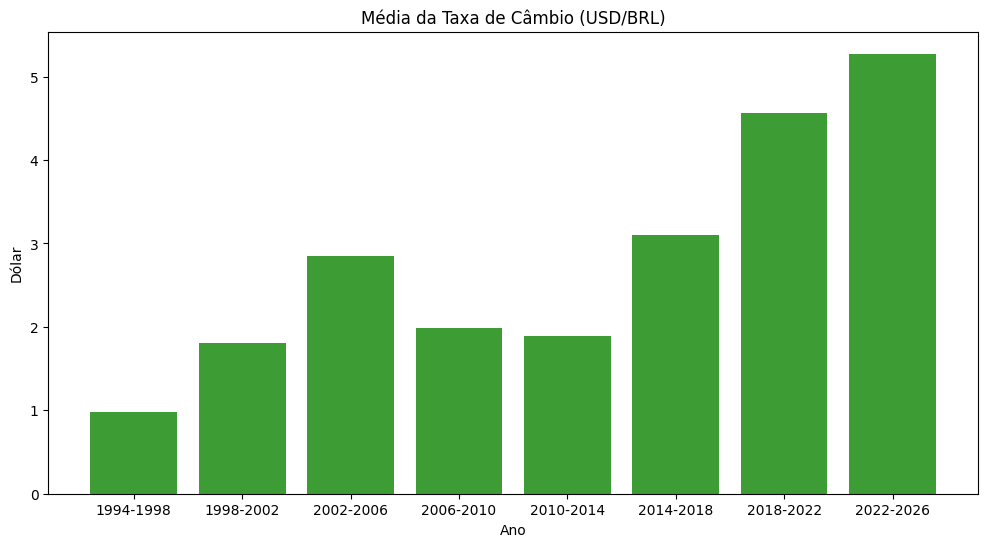

In [48]:
plt.figure(figsize=(12,6))
plt.bar(df_grouped_by_four_years['Período'], df_grouped_by_four_years['Fechamento'], color='#3e9c35')
plt.title('Média da Taxa de Câmbio (USD/BRL)')
plt.ylabel('Dólar')
plt.xlabel('Ano')
plt.plot()

In [49]:
dolar_variation = df_grouped_by_four_years['Fechamento'].pct_change()
print(dolar_variation*100)

0          NaN
1    82.824903
2    58.084607
3   -30.436173
4    -4.533247
5    63.969557
6    47.363965
7    15.437079
Name: Fechamento, dtype: float64


This follow analysis focuses on the transition between each 4-year period, quantifying each change based strictly on the avaiable data.

**1. Transition from 1994-98 to 1998-02**
* From an average of **BRL 0.98** to **BRL 1.80**.
* **Numerical Analysis:** An **83% increase** in the average exchange rate is observed. This is the largest percentage jump in the entire dataset, indicating an abrupt structural change from the previous level.

**2. Transition from 1998-02 to 2002-06**
* From an average of **BRL 1.80** to **BRL 2.84**.
* **Numerical Analysis:** The upward trend continued with an **additional 58% increase**. This demonstrates that the upward movement was not an isolated event but a sustained trend that extended over multiple periods.

**3. Transition from 2002-06 to 2006-10**
* From an average of **BRL 2.84** to **BRL 1.98**.
* **Numerical Analysis:** A trend reversal occurred, with a **30% decrease** in the average rate. This was the most significant appreciation movement for the Real in the entire historical series analyzed.

**4. Transition from 2006-10 to 2010-14**
* From an average of **BRL 1.98** to **BRL 1.89**.
* **Numerical Analysis:** The downward trend in the average continued, but with less intensity: a **4.5% reduction**. At **BRL 1.89**, the exchange rate reached its lowest average value since the beginning of the first upward cycle.

**5. Transition from 2010-14 to 2014-18**
* From an average of **BRL 1.89** to **BRL 3.10**.
* **Numerical Analysis:** A new and sharp upward trend reversal occurred, with a **64% increase**. This percentage jump is comparable in magnitude to the first major increase observed in the series.

**6. Transition from 2014-18 to 2018-22**
* From an average of **BRL 3.10** to **BRL 4.56**.
* **Numerical Analysis:** The upward trajectory persisted, with a **47% increase** over the previous period's average.

**7. Transition from 2018-22 to 2022-26**
* From an average of **BRL 4.56** to **BRL 5.27**.
* **Numerical Analysis:** The pace of the increase slowed compared to the previous periods, registering a **15% rise**. The average settled at the highest level in the entire historical series. (Note: This last period represents a partial average based on data up to the present).

A purely numerical analysis of the data reveals a non-linear behavior for the exchange rate. Instead of a gradual trend, the series is characterized by periods of relative stability interrupted by abrupt, large-magnitude changes (both upward and downward), such as the +83% and +64% jumps, and the -30% reversal. The data itself shows high volatility between the 4-year periods.